In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kroonstad
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | yeppoon
Processing Record 7 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | zhigansk
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | sechura
Processing Record 22 of Set 1 | huarmey
Processing

In [21]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [22]:
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kroonstad,-27.6504,27.2349,12.04,88,53,2.40,ZA,1650851589
1,yulara,-25.2406,130.9889,19.91,64,100,2.57,AU,1650851590
2,faanui,-16.4833,-151.7500,27.35,72,28,3.22,PF,1650851591
3,mataura,-46.1927,168.8643,12.49,74,88,6.09,NZ,1650851591
4,ushuaia,-54.8000,-68.3000,2.81,81,0,3.09,AR,1650851592
...,...,...,...,...,...,...,...,...,...
556,havelock,34.8791,-76.9013,21.08,86,0,1.34,US,1650851786
557,benguela,-12.5763,13.4055,23.45,87,76,0.80,AO,1650852003
558,isoka,-10.1606,32.6335,16.44,99,97,0.75,ZM,1650852004
559,haicheng,40.8516,122.7475,20.34,61,97,6.36,CN,1650852006


In [24]:
### Convert Raw Data to DataFrame
## Export the city data into a .csv.
## Display the DataFrame

In [ ]:
city_data_pd.to_csv('filename.csv')

In [ ]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,22.271582,17.549432,60.371975,70.864198,58.435626,7.848924,1.650850e+09
std,32.923202,89.208214,20.738758,21.727535,39.879576,5.751062,1.448159e+02
min,-54.800000,-175.200000,-0.800000,1.000000,0.000000,0.000000,1.650850e+09
25%,-6.008600,-59.656750,45.610000,59.500000,17.000000,3.950000,1.650850e+09
50%,28.017000,22.224700,65.230000,75.000000,75.000000,6.440000,1.650850e+09
75%,50.123550,94.041700,77.065000,88.000000,100.000000,10.360000,1.650851e+09
max,78.218600,179.316700,95.140000,100.000000,100.000000,62.140000,1.650851e+09


In [ ]:
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        567 non-null    object 
 1   Lat         567 non-null    float64
 2   Lng         567 non-null    float64
 3   Max Temp    567 non-null    float64
 4   Humidity    567 non-null    int64  
 5   Cloudiness  567 non-null    int64  
 6   Wind Speed  567 non-null    float64
 7   Country     567 non-null    object 
 8   Date        567 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.0+ KB


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [ ]:
city_data_info = city_data_pd

In [ ]:
city_data_pd["Humidity"] = city_data_pd["Humidity"].astype(float)

In [ ]:
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        567 non-null    object 
 1   Lat         567 non-null    float64
 2   Lng         567 non-null    float64
 3   Max Temp    567 non-null    float64
 4   Humidity    567 non-null    float64
 5   Cloudiness  567 non-null    int64  
 6   Wind Speed  567 non-null    float64
 7   Country     567 non-null    object 
 8   Date        567 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 40.0+ KB


In [ ]:
city_data_pd['Humidity'] == 100


0      False
1      False
2      False
3      False
4      False
       ...  
562    False
563     True
564    False
565    False
566    False
Name: Humidity, Length: 567, dtype: bool

In [ ]:
#drop city that its humidity is 100
clean_city_data = city_data_info.loc[city_data_info['Humidity'] != "100"]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atbasar,51.8000,68.3333,33.12,54.0,7,7.87,KZ,1650850018
1,ponta do sol,32.6667,-17.1000,65.01,87.0,100,10.87,PT,1650850269
2,kaitangata,-46.2817,169.8464,57.72,65.0,56,19.62,NZ,1650850269
3,hilo,19.7297,-155.0900,83.28,84.0,100,3.00,US,1650850270
4,barrow,71.2906,-156.7887,19.42,73.0,75,10.36,US,1650850272


In [40]:
clean_city_data_df = clean_city_data

In [ ]:
## Latitude vs. Humidity Plot

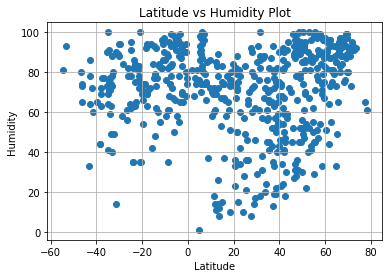

In [31]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker='o')
plt.title("Latitude vs Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

In [ ]:
## Latitude vs. Temperature Plot

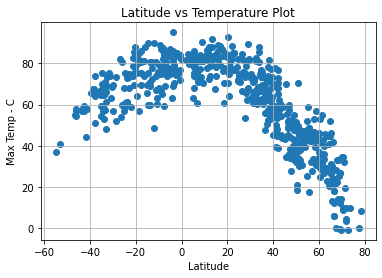

In [30]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],marker='o')
plt.title("Latitude vs Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temp - C")
plt.grid()
plt.show()



In [ ]:
##Latitude vs. Cloudiness Plot

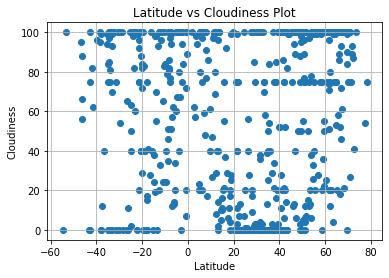

In [33]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker='o')
plt.title("Latitude vs Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()


In [ ]:
##Latitude vs. Wind Speed Plot

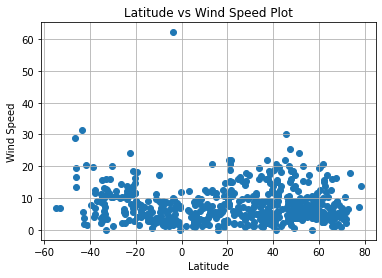

In [35]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker='o')
plt.title("Latitude vs Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()


In [ ]:
## Linear Regression

In [ ]:
## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [44]:
#Creating data for Northen Hemisphere which Lat is greater or equal to 0
Northern_Hemisphere_data = clean_city_data_df.loc[(clean_city_data_df["Lat"] >= 0)]

Northern_Hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atbasar,51.8000,68.3333,33.12,54.0,7,7.87,KZ,1650850018
1,ponta do sol,32.6667,-17.1000,65.01,87.0,100,10.87,PT,1650850269
3,hilo,19.7297,-155.0900,83.28,84.0,100,3.00,US,1650850270
4,barrow,71.2906,-156.7887,19.42,73.0,75,10.36,US,1650850272
5,jiamusi,46.8333,130.3500,57.60,31.0,100,6.24,CN,1650849975
...,...,...,...,...,...,...,...,...,...
561,ferry pass,30.5102,-87.2125,72.72,93.0,0,5.79,US,1650850713
562,wanning,18.8003,110.3967,84.85,75.0,28,14.67,CN,1650850714
563,hambantota,6.1241,81.1185,77.34,100.0,75,4.61,LK,1650850715
565,qujing,25.4833,103.7833,71.06,36.0,0,16.67,CN,1650850716


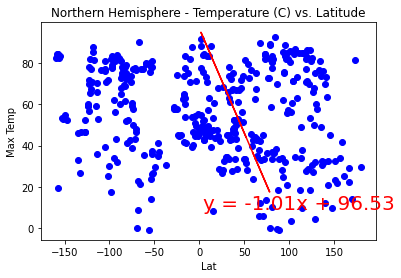

The r-squared is: 0.7775559190809824


In [45]:
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern_Hemisphere_data.iloc[:,2],Northern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Temperature (C) vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [46]:
#Creating data for Southern Hemisphere which Lat is less than 0

Southern_Hemisphere_data = clean_city_data_df.loc[(clean_city_data_df["Lat"] < 0)]

Southern_Hemisphere_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,kaitangata,-46.2817,169.8464,57.72,65.0,56,19.62,NZ,1650850269
6,bluff,-46.6000,168.3333,54.81,80.0,95,28.90,NZ,1650850273
11,hobart,-42.8794,147.3294,58.26,86.0,75,5.75,AU,1650850189
14,cape town,-33.9258,18.4232,57.90,77.0,75,8.01,ZA,1650850279
19,rikitea,-23.1203,-134.9692,73.26,84.0,100,12.66,PF,1650850283
...,...,...,...,...,...,...,...,...,...
532,kavieng,-2.5744,150.7967,84.51,70.0,100,7.65,PG,1650850692
550,camocim,-2.9022,-40.8411,76.48,89.0,100,7.34,BR,1650850705
556,chicama,-7.8447,-79.1469,59.54,83.0,77,6.24,PE,1650850710
557,huarmey,-10.0681,-78.1522,68.29,86.0,84,9.17,PE,1650850711


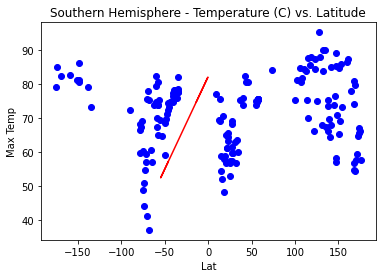

The r-squared is: 0.43593227265039053


In [47]:
x_values = Southern_Hemisphere_data["Lat"]
y_values = Southern_Hemisphere_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern_Hemisphere_data.iloc[:,2],Southern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Temperature (C) vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

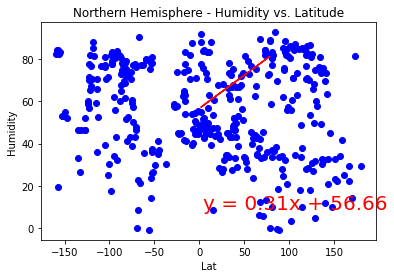

The r-squared is: 0.0668024292284052


In [48]:
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern_Hemisphere_data.iloc[:,2],Northern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

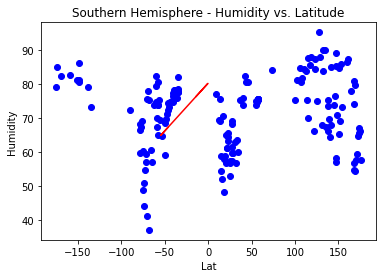

The r-squared is: 0.051852143548536324


In [49]:
x_values = Southern_Hemisphere_data["Lat"]
y_values = Southern_Hemisphere_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern_Hemisphere_data.iloc[:,2],Southern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

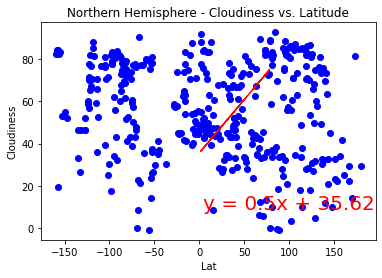

The r-squared is: 0.056838919462317145


In [50]:
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern_Hemisphere_data.iloc[:,2],Northern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
##Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

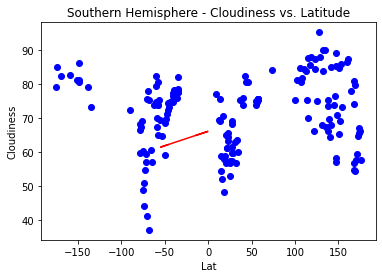

The r-squared is: 0.0009231349755592477


In [51]:
x_values = Southern_Hemisphere_data["Lat"]
y_values = Southern_Hemisphere_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern_Hemisphere_data.iloc[:,2],Southern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

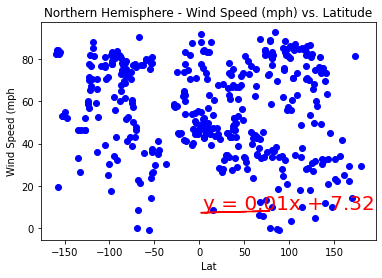

The r-squared is: 0.0014371579723139866


In [54]:
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern_Hemisphere_data.iloc[:,2],Northern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (mph")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
##Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

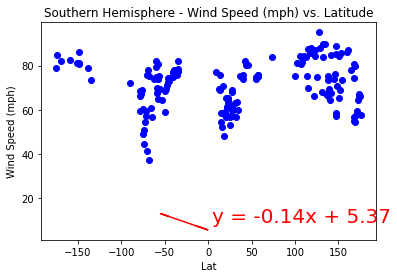

The r-squared is: 0.06874416500904101


In [55]:
x_values = Southern_Hemisphere_data["Lat"]
y_values = Southern_Hemisphere_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern_Hemisphere_data.iloc[:,2],Southern_Hemisphere_data.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Lat")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.show()
print(f"The r-squared is: {rvalue**2}")